In [32]:
from sklearn.preprocessing import StandardScaler # for standarizin the data
import numpy as np # for matrix math
import matplotlib.pyplot as plt # for plotting
import matplotlib.patches as mpatches # for legends
import pandas as pd # importing data
from tensorflow.examples.tutorials.mnist import input_data # importing more data

%matplotlib notebook


# function for calculating PCA
# X is the dataset as a matrix. Rows represent variables
# k is the output dimensionality
# should_print refers to whether the results after each step of calculation should be outputted
# Returns Y, matrix of each variable in the output space
# Return projection_mat, the projection matrix which new variables should be multiplied by to transform them into feature space
def PCA(X, k, should_print=True):
    # Standardize the Data!
    X_std = StandardScaler().fit_transform(X)
    if(should_print):
        print("Standardized X: \n", X_std[:10, :])
    
    # We could have just as easily said cov_mat = np.cov(X_std.T)
    mean_vec = np.mean(X_std, axis=0)
    cov_mat = (X_std - mean_vec).T.dot(X_std - mean_vec) / (X_std.shape[0]-1)
    if(should_print):
        print("Covariance Matrix: \n", cov_mat)
    
    # now, get th eigenvectors and eigenvalues of the covariance matrix
    w,v = np.linalg.eig(cov_mat)
    if(should_print):
        print("Eigenvalues: ", w)
        print("Normalized Eigenvectors: \n", v)

    
    # We don't need to sort the eigenvalues because np.ligalg.eig already does that for us!
    # now, lets construct the projection matrix. This will take our original data and reduce its dimensionality
    projection_mat = v[:, :k]
    if(should_print):
        print("Projection Matrix: \n", projection_mat)
    
    # use the projection matrix to get the feature space data points
    Y = X_std.dot(projection_mat)
    return Y, projection_mat

In [33]:
# A helper function to plot the outputs of PCA in 2D
# Y is the output form PCA. The 2D positions of each variable
# y is the labels. These will be used for coloring the dataset
# classes is an array of possible classes. These will also be used for coloring. 
def plot_PCA2D(Y, y, classes, cmap_name='jet', marker=','):
    cs = []
    cmap = plt.get_cmap(cmap_name)
    
    labels_patches = []

    for i, c in enumerate(classes):
        indicies = np.where(y==c)
        vals = Y[indicies]
        plt.scatter(vals[:, 0], vals[:, 1], marker=marker, color=cmap(i/len(classes)))
        patch = mpatches.Patch(color=cmap(i/len(classes)), label=classes[i])
        labels_patches.append(patch)

    plt.legend(labels_patches, classes, loc=2) 
    plt.show()

In [34]:
df = pd.read_csv(
    filepath_or_buffer='https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data', 
    header=None, 
    sep=',')
df.columns=['sepal_len', 'sepal_wid', 'petal_len', 'petal_wid', 'class']
classes = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
d = 4

print("Dataframe: ", df.tail())

X = df.ix[:, 0:d].values
y = df.ix[:, d].values

print("X: \n", X[:10, :])
print("y: \n", y[:10])

Dataframe:       sepal_len  sepal_wid  petal_len  petal_wid           class
145        6.7        3.0        5.2        2.3  Iris-virginica
146        6.3        2.5        5.0        1.9  Iris-virginica
147        6.5        3.0        5.2        2.0  Iris-virginica
148        6.2        3.4        5.4        2.3  Iris-virginica
149        5.9        3.0        5.1        1.8  Iris-virginica
X: 
 [[ 5.1  3.5  1.4  0.2]
 [ 4.9  3.   1.4  0.2]
 [ 4.7  3.2  1.3  0.2]
 [ 4.6  3.1  1.5  0.2]
 [ 5.   3.6  1.4  0.2]
 [ 5.4  3.9  1.7  0.4]
 [ 4.6  3.4  1.4  0.3]
 [ 5.   3.4  1.5  0.2]
 [ 4.4  2.9  1.4  0.2]
 [ 4.9  3.1  1.5  0.1]]
y: 
 ['Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa']


Standardized X: 
 [[-0.90068117  1.03205722 -1.3412724  -1.31297673]
 [-1.14301691 -0.1249576  -1.3412724  -1.31297673]
 [-1.38535265  0.33784833 -1.39813811 -1.31297673]
 [-1.50652052  0.10644536 -1.2844067  -1.31297673]
 [-1.02184904  1.26346019 -1.3412724  -1.31297673]
 [-0.53717756  1.95766909 -1.17067529 -1.05003079]
 [-1.50652052  0.80065426 -1.3412724  -1.18150376]
 [-1.02184904  0.80065426 -1.2844067  -1.31297673]
 [-1.74885626 -0.35636057 -1.3412724  -1.31297673]
 [-1.14301691  0.10644536 -1.2844067  -1.4444497 ]]
Covariance Matrix: 
 [[ 1.00671141 -0.11010327  0.87760486  0.82344326]
 [-0.11010327  1.00671141 -0.42333835 -0.358937  ]
 [ 0.87760486 -0.42333835  1.00671141  0.96921855]
 [ 0.82344326 -0.358937    0.96921855  1.00671141]]
Eigenvalues:  [ 2.93035378  0.92740362  0.14834223  0.02074601]
Normalized Eigenvectors: 
 [[ 0.52237162 -0.37231836 -0.72101681  0.26199559]
 [-0.26335492 -0.92555649  0.24203288 -0.12413481]
 [ 0.58125401 -0.02109478  0.14089226 -0.80115427]
 

<IPython.core.display.Javascript object>


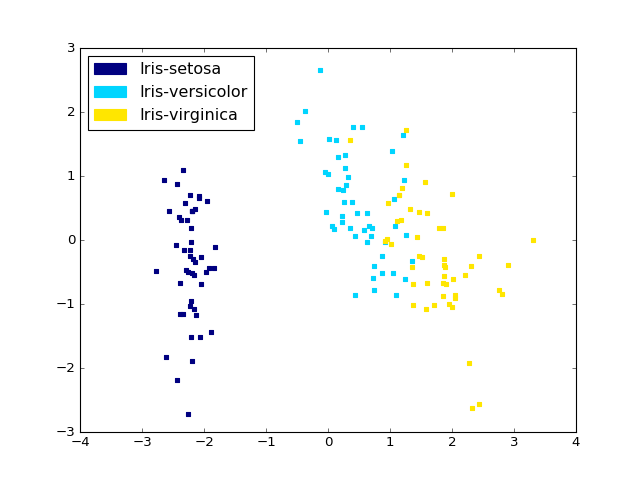

In [36]:
Y, proj_mat = PCA(X, 2, should_print=True)
plot_PCA2D(classes=classes, Y=Y, y=y, cmap_name='jet')

In [37]:
plt.close() # close the interactive version of the last plot, so the next one can be interative!

In [38]:
mnist = input_data.read_data_sets("MNIST_data/", one_hot=False)

d = 784
classes = [1, 2, 3, 4, 5, 6, 7, 8, 9, 0]
X = np.matrix(mnist.validation.images)
y = np.array(mnist.validation.labels)

print("X: \n", X[:10, :])
print("y: \n", y[:10])

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
X: 
 [[ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 ..., 
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]]
y: 
 [5 0 4 1 9 2 1 3 1 4]


In [39]:
Y, proj_mat = PCA(X, 2, should_print=False)


<IPython.core.display.Javascript object>


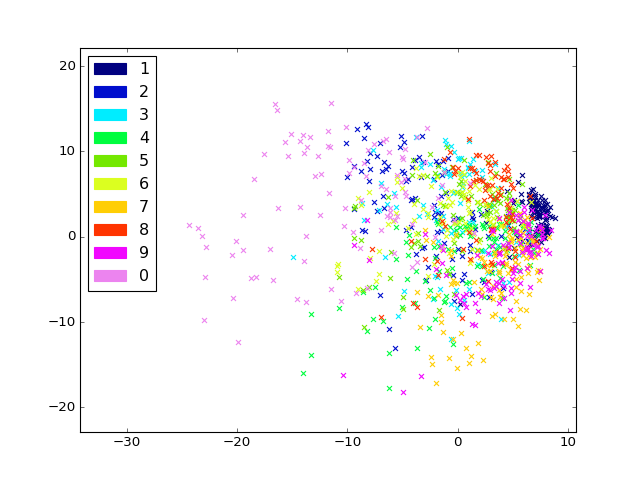

In [40]:
num_to_visualize=1000
plot_PCA2D(classes=classes, Y=Y[:num_to_visualize], y=y[:num_to_visualize], cmap_name='gist_ncar', marker='x')

In [41]:
plt.close()